<a href="https://colab.research.google.com/github/vhppacheco/ic-ita-finance-ia/blob/main/clustering/clustering_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libs

In [3]:
!pip install -q yfinance
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install sqldf
!pip install -q tsfeatures
!pip install umap-learn

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:13 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64

In [4]:
import requests
import pandas as pd
from time import sleep
import yfinance as yf
from bs4 import BeautifulSoup
from selenium import webdriver
import json
import sys
import datetime

from google.colab import drive
drive.mount('/content/drive')



from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: use options instead of chrome_options


#Transforming the data

##Reading data

In [5]:
df_indicators = pd.concat([pd.read_excel('/content/drive/MyDrive/IC ITA/df_SP500_Final.xlsx'),
                           pd.read_excel('/content/drive/MyDrive/IC ITA/df_Ibov_Final.xlsx')])

In [6]:
df_indicators.columns

Index(['Data', ' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta sp500', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe SP500',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig',
       ' Data 

In [ ]:
df_indicators

In [ ]:
df_indicators.info()

#EDA

In [ ]:
df_indicators.isnull().sum()

#Models Applications

##UMAP testing

In [9]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10

In [10]:
import umap

In [32]:
indicators_application = df_indicators.drop(['Data','Código', ' Data do Bal  consolid:sim*'],axis='columns').replace('-',0).astype(float)
indicators_application = indicators_application.fillna(0)

In [33]:
columns = [#'Fechamento ajust p/ prov Em moeda orig',
       #' Ativo Tot  ajust por infl  em milhares  consolid:sim*',
      ' LiqCor  consolid:sim*', ' LiqSec  consolid:sim*',
       ' Exig / PL  consolid:sim*', ' DivBr/Ebitda  de 3 meses  consolid:sim*',
       ' Margem Liquida  de 3 meses  consolid:sim*', 'ROA de 3 meses',
       'ROE de 3 meses', 'P/L de 3 meses ajust pela infl',
       'Valor Mercado da empresa Em US Dollars em milhares',
       ' Patrim Liq  Em US Dollars  em milhares  consolid:sim*',
       'Price/Book ratio', 'EV Em US Dollars em milhares consolid:sim*',
       'EV/EBITDA emp Em US Dollars de 3 meses consolid:sim*',
       'P/FCF Em US Dollars de 3 meses consolid:sim*',
       'Media do fechamento em 1 trimestre Em US Dollars ajust p/ prov',
       'Beta sp500', 'TIR média trimestral em 3 meses Em moeda orig',
       'Bollinger 90/2 Média Em moeda orig',
       'Volatilidade base trimestral 3 meses Em moeda orig', 'Sharpe SP500',
       'VAR % base diária confiança: 95% 3 meses Em moeda orig',
       'Max Drd (c/rec) ajust p/ prov 3 meses Em moeda orig']

for column in columns:
  indicators_application[column] = indicators_application[column].loc[indicators_application[column].isnull()==False]
  indicators_application = indicators_application[np.isfinite(indicators_application[column]) == True]
  indicators_application[column] = (indicators_application[column]-min(indicators_application[column].dropna())) /(max(indicators_application[column].dropna())-min(indicators_application[column].dropna()))

In [34]:
indicators_application = indicators_application.fillna(0)

In [35]:
indicators_data = indicators_application[columns].values
scaled_indicators_data = StandardScaler().fit_transform(indicators_data)

In [36]:
indicators_data.shape

(12936, 22)

In [37]:
reducer = umap.UMAP()

In [38]:
embedding = reducer.fit_transform(indicators_data)
embedding.shape 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(12936, 2)

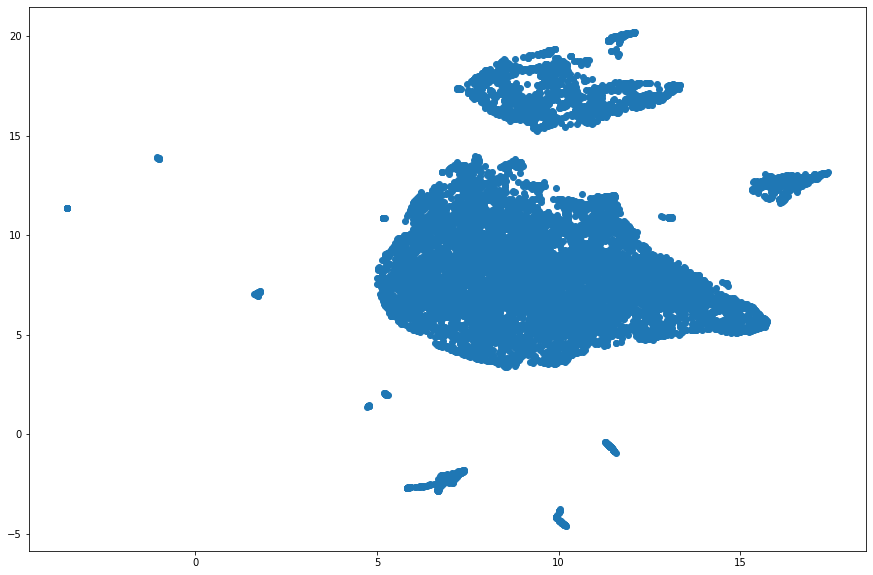

In [39]:
plt.scatter(embedding[:,0], embedding[:,1])

Text(0.5, 1.0, 'UMAP projection of the S&P500 Index')

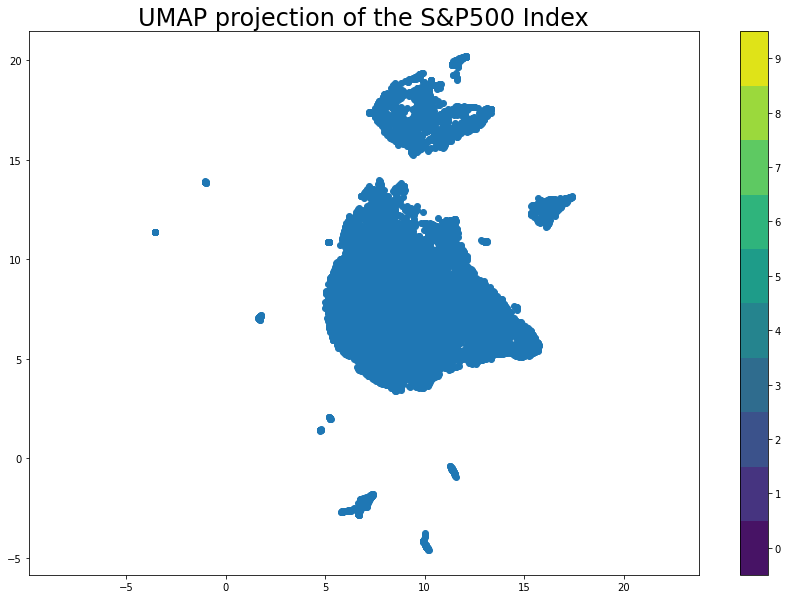

In [40]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    #c=indicators_data
    )
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the S&P500 and Ibov Index', fontsize=24)

In [41]:
data = indicators_data 

In [42]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   range(len(u)), 
                   #c=data
                   )
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], 
                   u[:,1], 
                   #c=data
                   )
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], 
                   u[:,1], 
                   u[:,2], 
                   #c=data
                   )
    plt.title(title, fontsize=18)

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"
/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


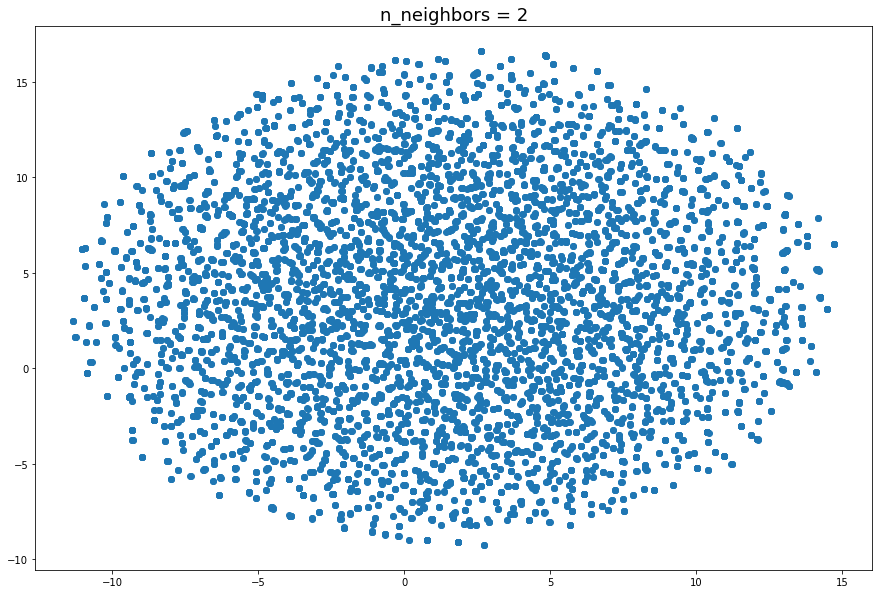

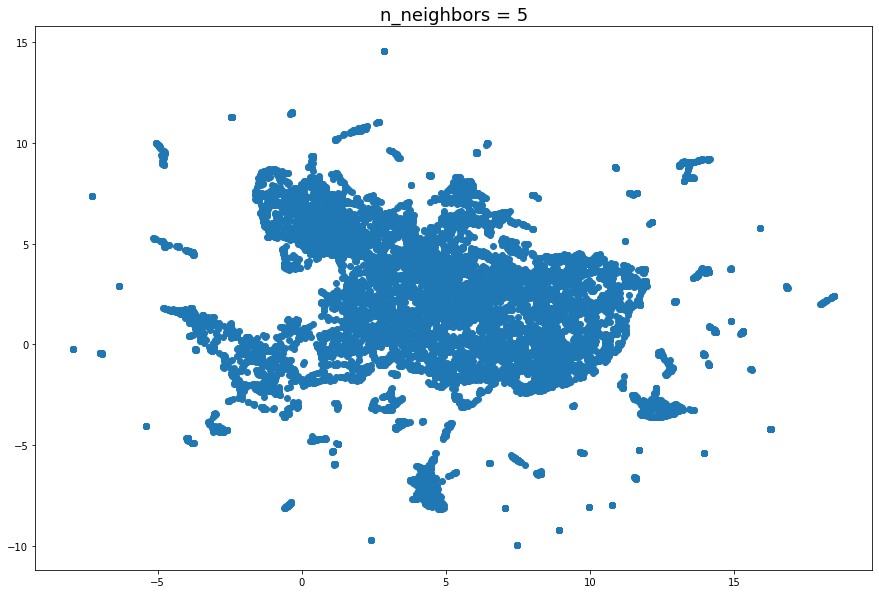

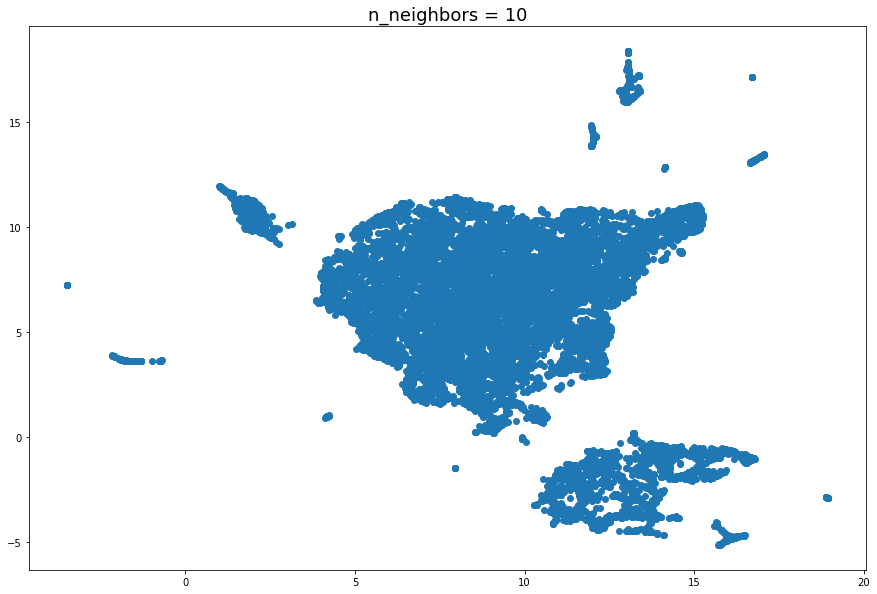

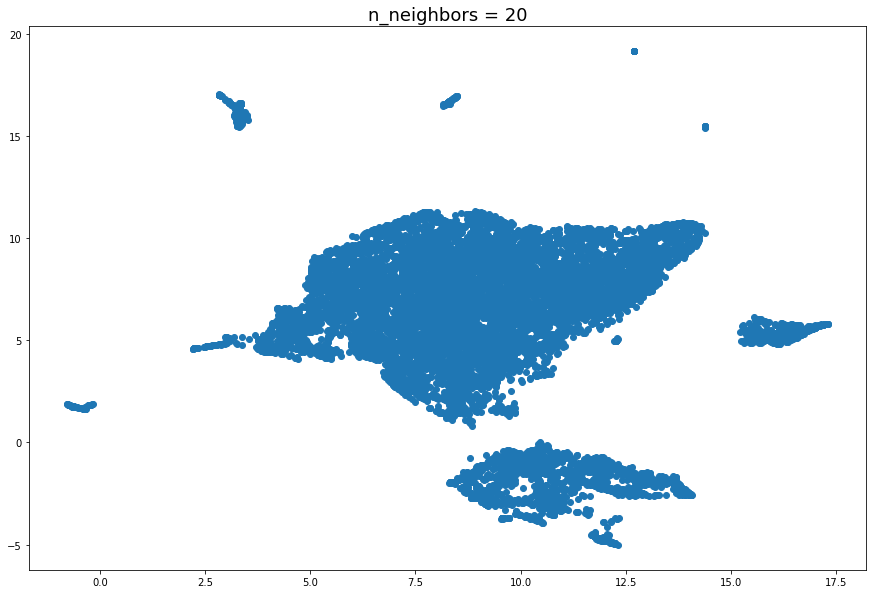

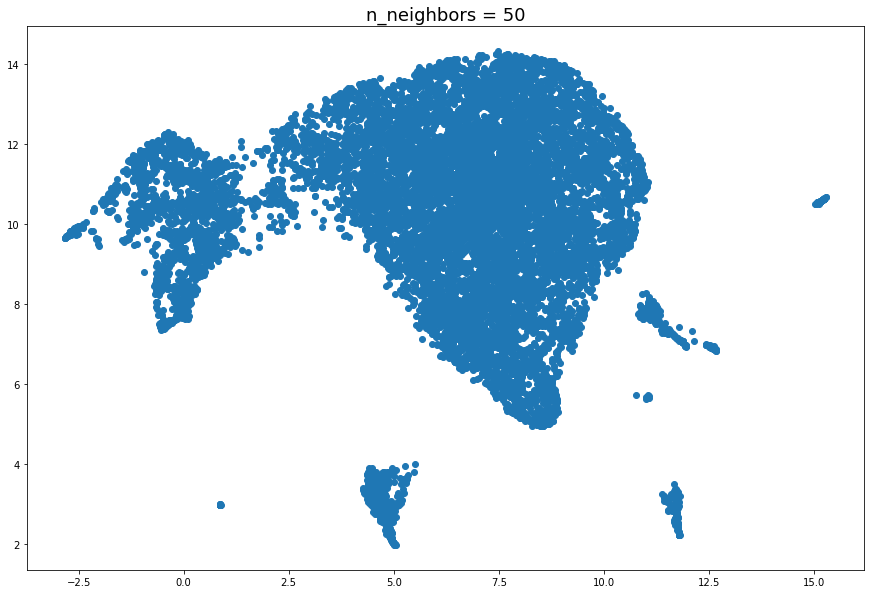

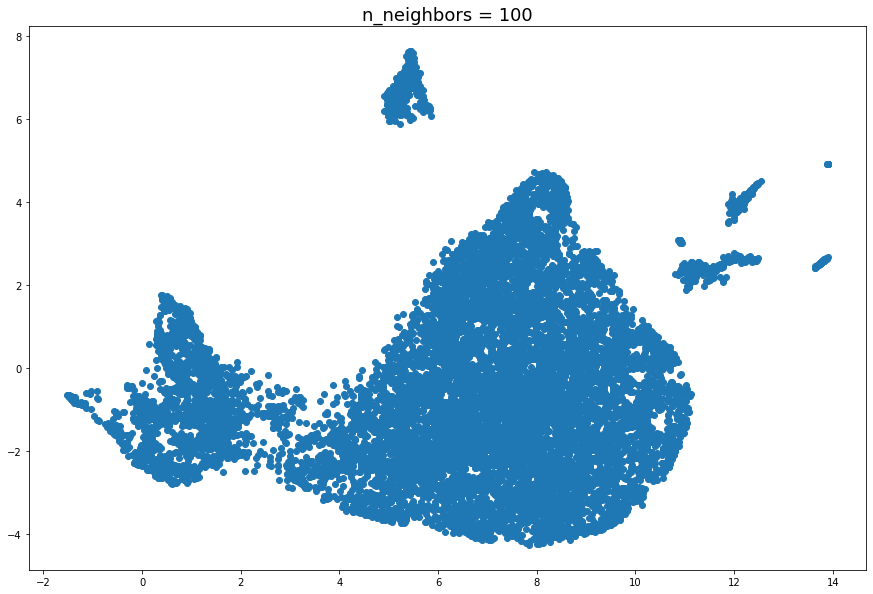

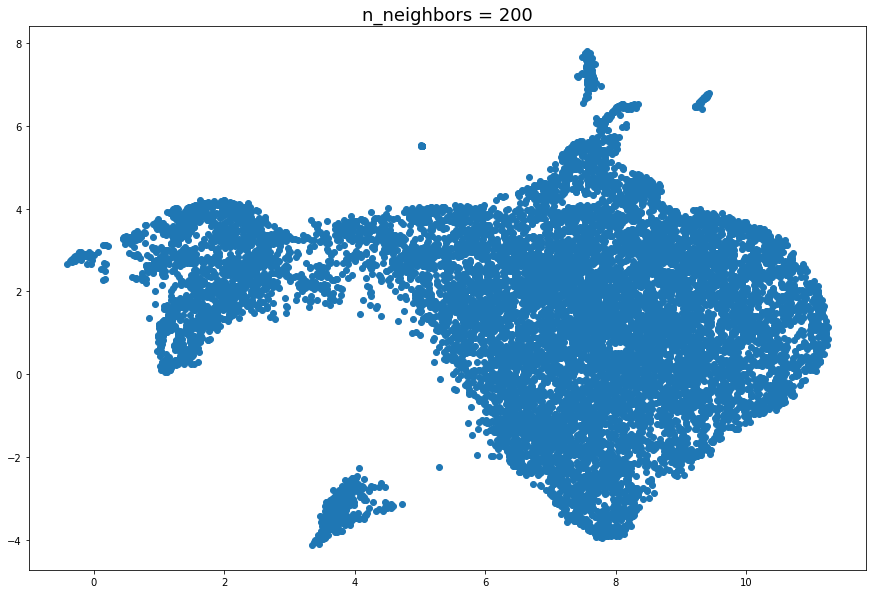

In [43]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

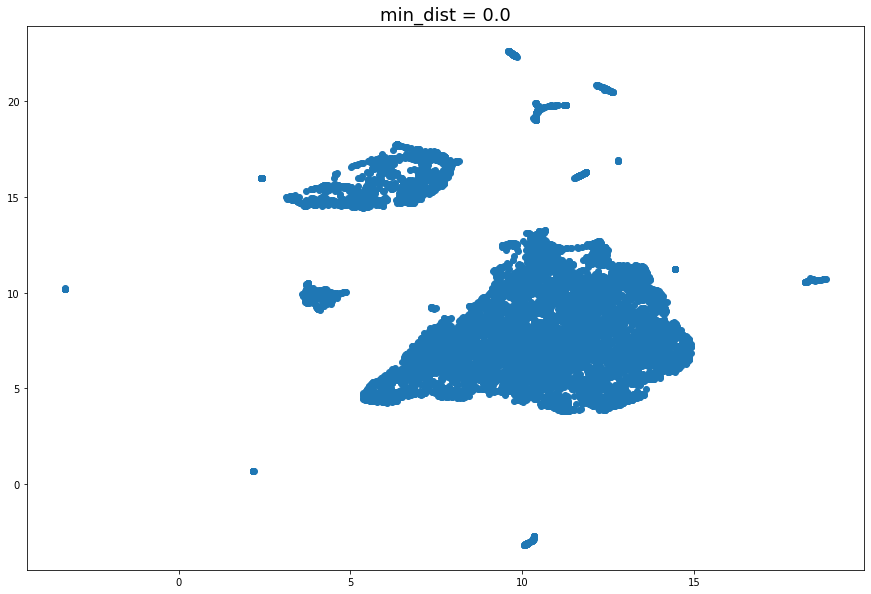

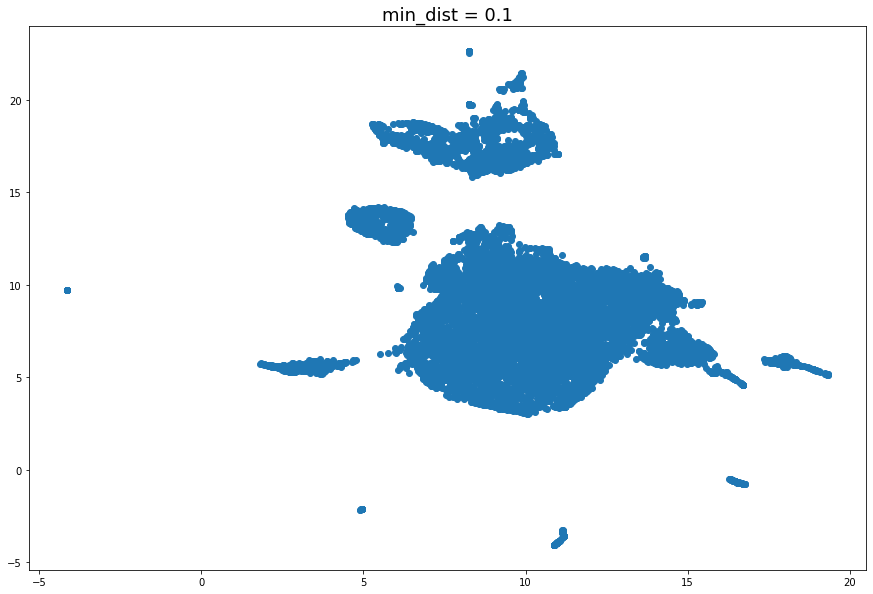

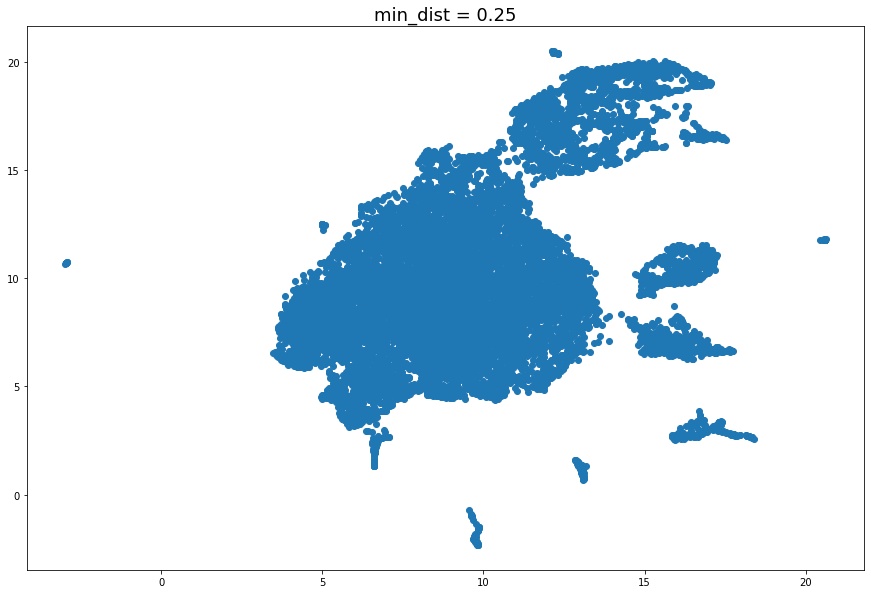

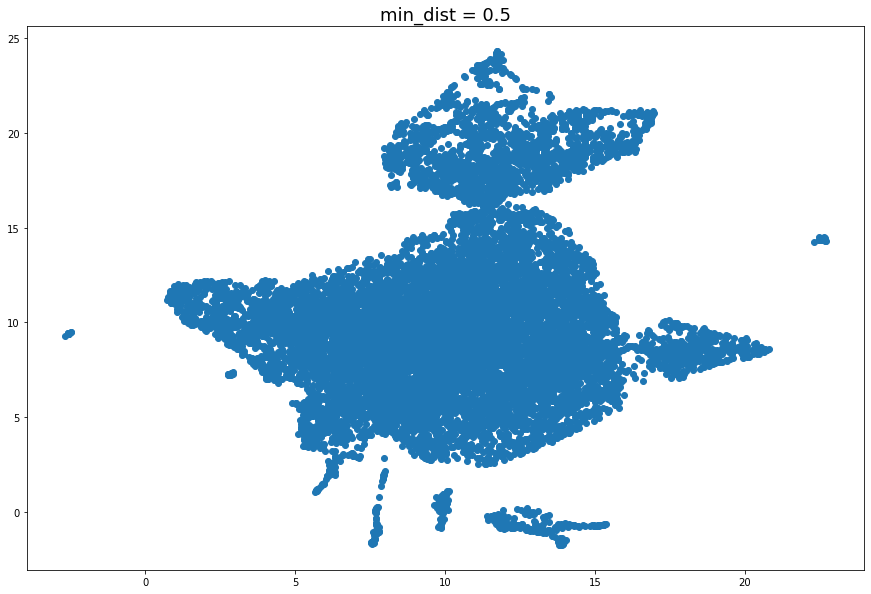

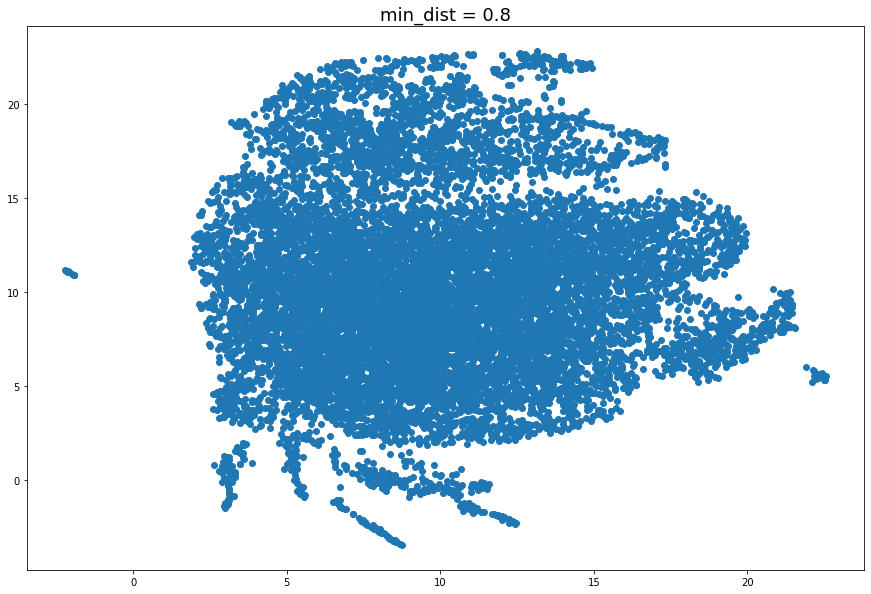

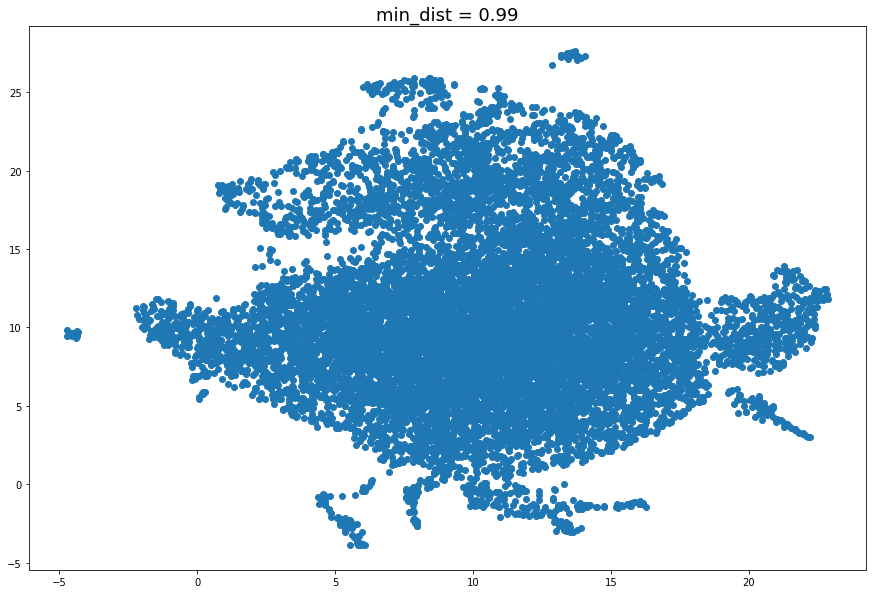

In [44]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

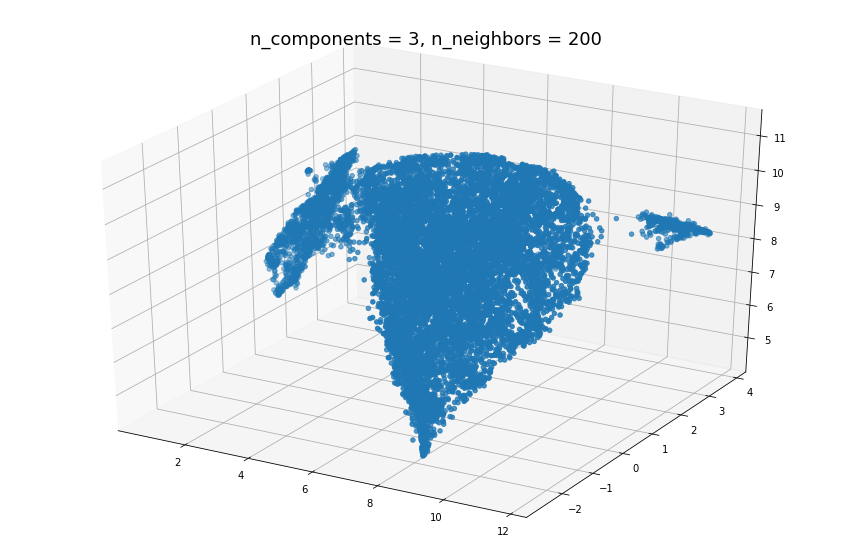

In [45]:
draw_umap(n_components=3,n_neighbors=200, title='n_components = 3, n_neighbors = 200')

##K-Means application for UMAP output

In [46]:
kmeans_input = pd.DataFrame(embedding)
kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

In [47]:
columns = ['x','y']
#Normalização dos dados
for column in columns:
  kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

In [48]:
X = kmeans_input.iloc[:,[0,1]].values

In [49]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,10
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [50]:
WCSS = []

In [51]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

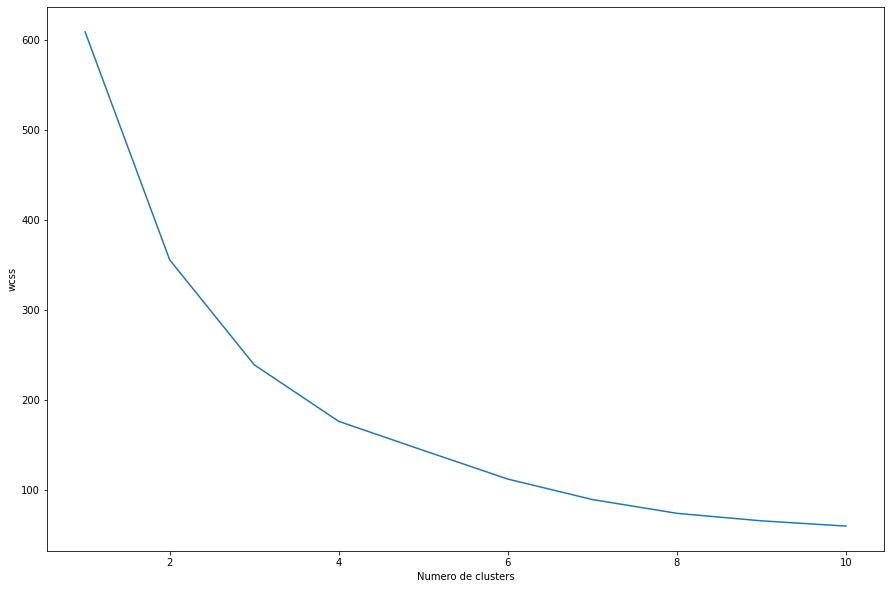

In [52]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [53]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)

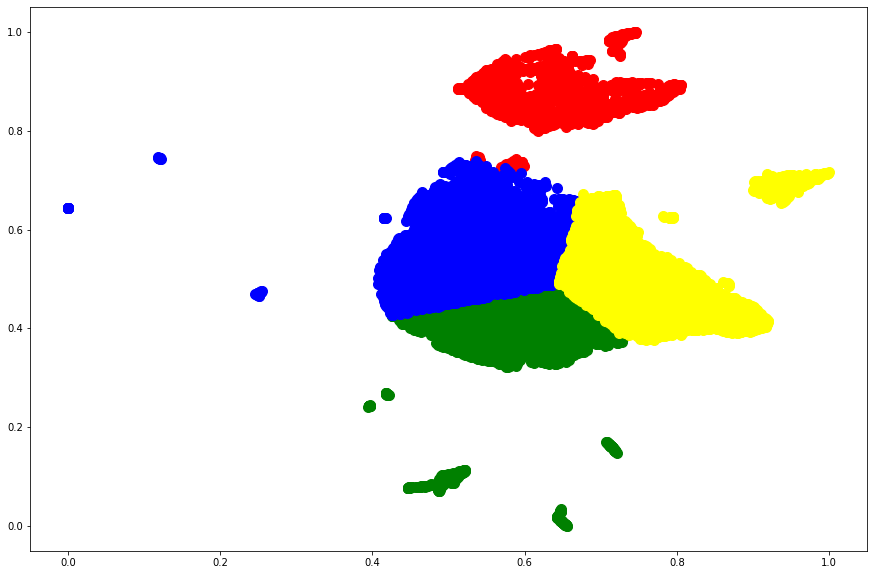

In [54]:
plt.scatter(X[previsoes == 0,0], X[previsoes == 0,1],s=100, c='red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1,0], X[previsoes == 1,1],s=100, c='green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2,0], X[previsoes == 2,1],s=100, c='blue', label = 'Cluster 3')
plt.scatter(X[previsoes == 3,0], X[previsoes == 3,1],s=100, c='yellow', label = 'Cluster 4')

In [55]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [56]:
kmeans_output

,0,1,2
0,0.444684,0.491592,2.0
1,0.708954,0.413455,3.0
2,0.721287,0.447884,3.0
3,0.559233,0.394424,1.0
4,0.713528,0.438292,3.0
...,...,...,...
12931,0.611671,0.922584,0.0
12932,0.613383,0.923980,0.0
12933,0.749639,0.863016,0.0
12934,0.572707,0.941000,0.0


In [57]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [59]:
#preenchendo a coluna de clusters no dataframe principal
indicators_application['Cluster UMAP'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster UMAP'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [60]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,1918,1918
1.0,2555,2555
2.0,4582,4582
3.0,3881,3881


#UMAP n-neighbors x WCSS K-means

In [62]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [63]:
#função que plota o gráfico do WCSS pra cada n_neighbors do UMAP e adiciona os resultados numa matriz
def umap_kmeans(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);

    #k-means
    kmeans_input = pd.DataFrame(u)
    kmeans_input.rename(columns={0:'x',1:'y'},inplace=True)

    columns = ['x','y']
    for column in columns:
      kmeans_input[column] = (kmeans_input[column]-min(kmeans_input[column].dropna()))/(max(kmeans_input[column].dropna())-min(kmeans_input[column].dropna()))

    X = kmeans_input.iloc[:,[0,1]].values

    WCSS = []
    for i in range (1,11):
      kmeans = KMeans(n_clusters=i,random_state=0)
      kmeans.fit(X)
      WCSS.append(kmeans.inertia_)

    rel_umap_kmeans[0].append(n_neighbors)
    rel_umap_kmeans[1].append(optimal_number_of_clusters(WCSS))

    plt.plot(range(1,11),WCSS)
    plt.xlabel('Numero de clusters')
    plt.ylabel('wcss')

/usr/local/lib/python3.7/dist-packages/umap/spectral.py:261: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


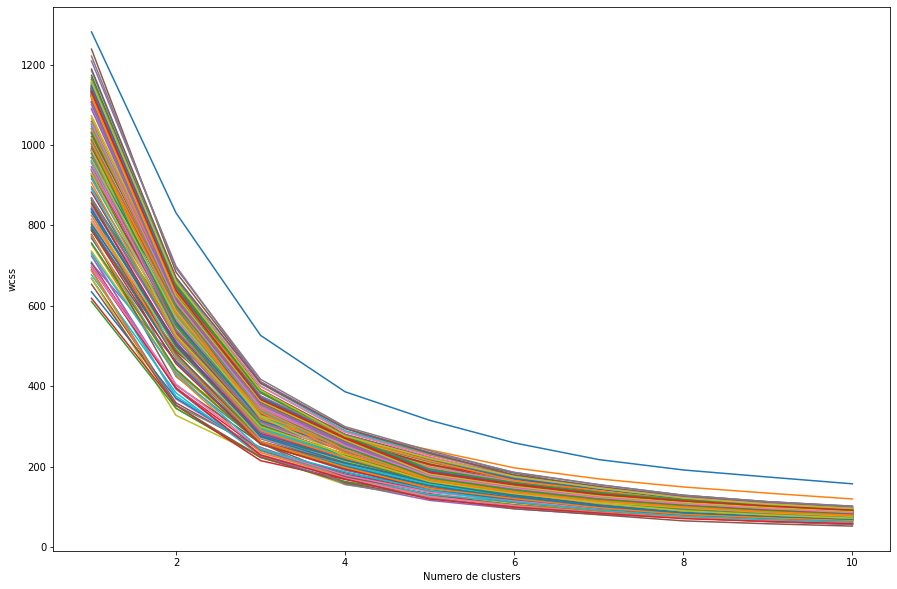

In [64]:
rel_umap_kmeans = [[],[]]

for n in range(2,200+1):
    umap_kmeans(n_neighbors=n, title='n_neighbors = {}'.format(n))

In [65]:
test = pd.DataFrame(rel_umap_kmeans).T
test.rename(columns={0:'n_neighbors',1:'n_clusters'},inplace=True)

In [67]:
test

,n_neighbors,n_clusters
0,2,6
1,3,7
2,4,7
3,5,6
4,6,6
...,...,...
194,196,5
195,197,6
196,198,6
197,199,5


Text(0, 0.5, 'n_clusters')

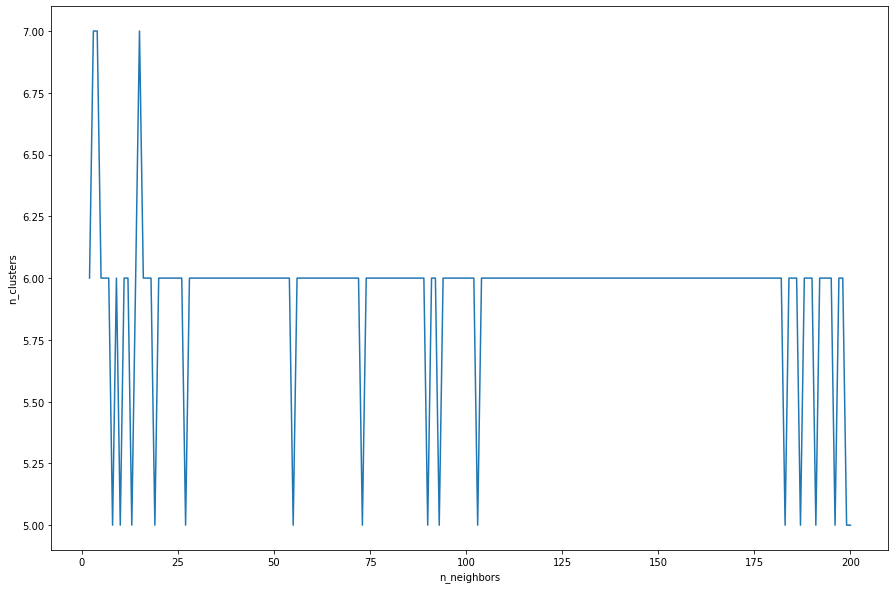

In [68]:
plt.plot(test['n_neighbors'],test['n_clusters'])
plt.xlabel('n_neighbors')
plt.ylabel('n_clusters')

##K-Means application for the same features used in UMAP

In [71]:
indicators_data.shape

(12936, 22)

In [72]:
X = indicators_data#.iloc[:,[0,13]].values

In [73]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12
from pandas.plotting import register_matplotlib_converters

from matplotlib import pyplot

from sklearn.metrics import mean_squared_error
from math import sqrt

In [74]:
X

array([[0.01516101, 0.01413287, 0.31084966, ..., 0.02157114, 0.07185784,
        0.99336643],
       [0.04502318, 0.03841585, 0.31052979, ..., 0.03214158, 0.06586732,
        0.8521645 ],
       [0.0448444 , 0.03851442, 0.31052376, ..., 0.04789901, 0.05948435,
        0.81744302],
       ...,
       [0.02166154, 0.02258345, 0.31065333, ..., 0.02113908, 0.12771196,
        0.70940465],
       [0.01629078, 0.01721775, 0.31065454, ..., 0.02113908, 0.11717236,
        1.        ],
       [0.02224398, 0.02316535, 0.3106641 , ..., 0.02113908, 0.11717236,
        1.        ]])

In [75]:
WCSS = []

In [76]:
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(X)
  WCSS.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

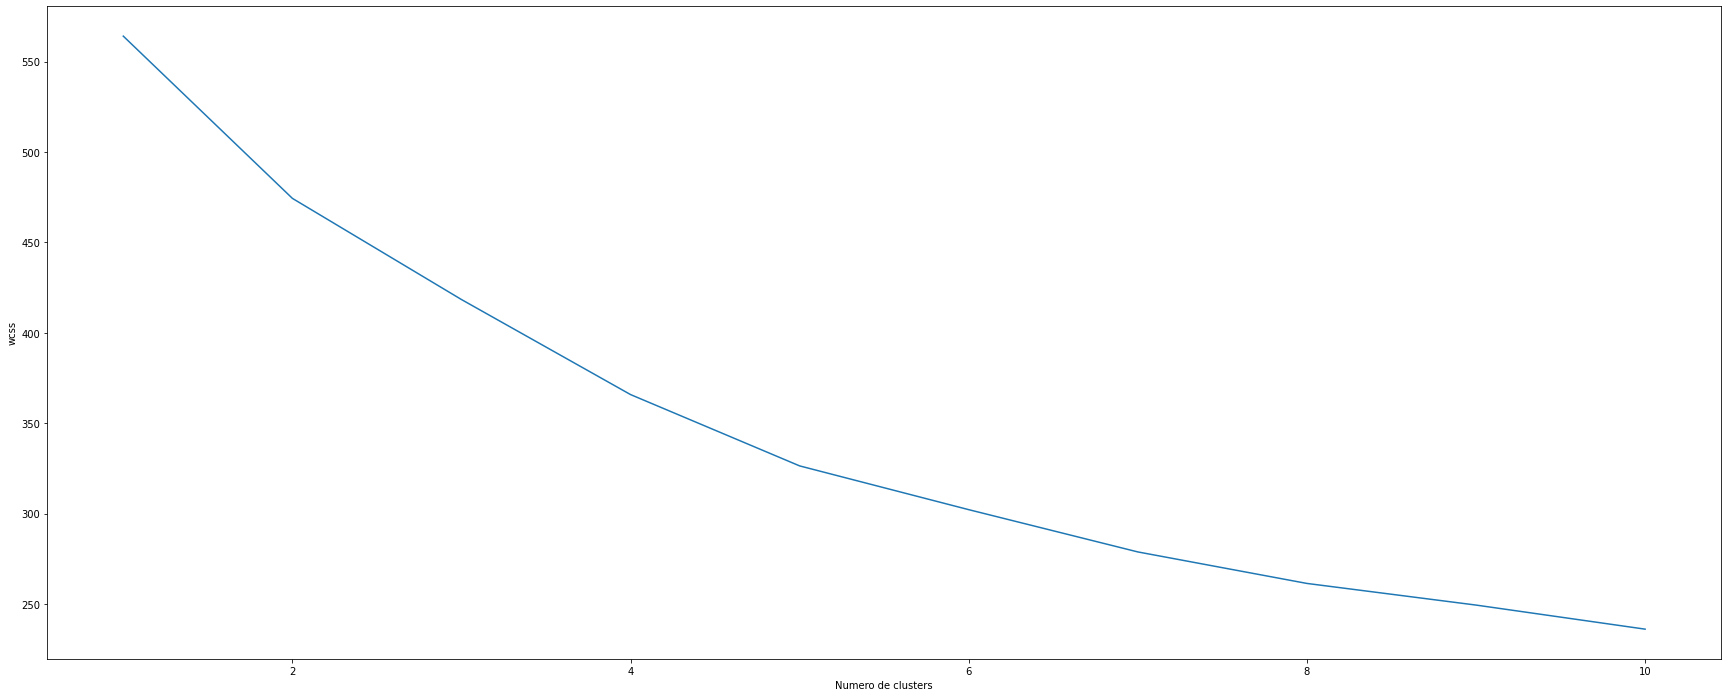

In [77]:
plt.plot(range(1,11),WCSS)
plt.xlabel('Numero de clusters')
plt.ylabel('wcss')

In [78]:
kmeans = KMeans(n_clusters=3, random_state=0)
previsoes = kmeans.fit_predict(X)

In [79]:
kmeans_output = pd.DataFrame(np.column_stack((kmeans_input, previsoes)))

In [80]:
kmeans_output = kmeans_output.rename(columns={0:'x',1:'y',2:'Cluster'})

In [81]:
indicators_application['Cluster k-means'] = ''
for i in range(0,len(indicators_application)):
  cluster = int(kmeans_output['Cluster'].iloc[i])
  indicators_application['Cluster k-means'].iloc[i] = int(cluster)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [82]:
kmeans_output.groupby('Cluster',dropna=False).count()

,x,y
Cluster,,
0.0,6727,6727
1.0,1877,1877
2.0,4332,4332


In [ ]:
indicators_application[['Cluster k-means','Código']].groupby('Cluster k-means',dropna=False).count()

In [ ]:
indicators_application[['Cluster UMAP','Código']].groupby('Cluster UMAP',dropna=False).count()

In [ ]:
indicators_application